# Gaussian experiment
All data is generated on the fly

In [1]:
import sys
sys.path.append('../python')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from machine_learning import *
import scipy.stats
import os
import sobol
import resource
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""


Using TensorFlow backend.


# Setup

In [2]:
def generate_sobol_points(M, dim):
    points = []
    for i in range(M):
        points.append(sobol.i4_sobol(dim,i)[0])
    return np.array(points)

dim = 6
M = int(2**15)

data_sources = {"Monte Carlo": np.random.uniform(0, 1, (M,dim)),
                "QMC Sobol" : generate_sobol_points(M, dim),
                "MC Normal" : np.random.normal(0,1, (M, dim))}

def sine_functional(x):
    return np.sum(np.sin(4*np.pi*x), 1)
def normal_functional(x):
    return scipy.stats.norm.ppf(x)

def sum_functional(x):
    return np.sum(x, 1)

functionals = {"Sum": sum_functional,
               "Sine" : sine_functional,
               "Sine Normal" : lambda x : sine_functional(normal_functional(x)),
               "Sum Normal" : lambda x: sum_functional(normal_functional(x))
               }


gaussian_network =  [12, 12, 10, 12, 10, 12, 10, 10, 10, 12, 12,1]

epochs = 5000



# Training setup

In [3]:
def train(*, parameters, samples, title):
    train_sizes = [ 128, 256, 512, 1024]
    
    optimizers = {"SGD": keras.optimizers.SGD,
                 "Adam": keras.optimizers.Adam}
    
    losses = ["mean_squared_error", "mean_absolute_error"]
    
    for optimizer in optimizers.keys():
        for loss in losses:
            display(HTML("<h1>{}: Computed with {} with {}</h1>".format(title, optimizer, loss)))
    
    
            for train_size in train_sizes:
                tables = Tables.make_default()
                batch_size = train_size
                validation_size=train_size
                
                
                
                network_information = NetworkInformation(optimizer=optimizers[optimizer], epochs=epochs, 
                                                             network=gaussian_network, train_size=train_size,
                                                             validation_size=validation_size,
                                                            loss=loss, tries=1)
                    
                output_information = OutputInformation(tables=tables, title=title,
                                                          short_title=title)
                showAndSave.prefix='%s_%s_%s_ts_%d_bs_%d' %(title, optimizer, loss, batch_size, train_size)
                get_network_and_postprocess(parameters, samples, network_information = network_information,
                        output_information = output_information)
                
                showAndSave.prefix='%s_%s_%s_all_ts_%d_bs_%d' %(title, optimizer, loss, batch_size, train_size)
                tables.write_tables()
            
    

# Training


Training took 10.38906192779541 seconds


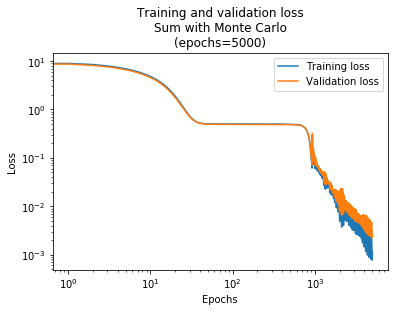

Best network index: 0
Total learning time took: 11 s


###################################################################
#Sum with Monte Carlo_SGD_mean_squared_error_ts_128_bs_128_network#
###################################################################
-----  ----  ----------
Layer  Size  Parameters
0      12    84
1      12    156
2      10    130
3      12    132
4      10    130
5      12    132
6      10    130
7      10    110
8      10    110
9      12    132
10     12    156
11     1     13
Sum          1415
-----  ----  ----------
###################################################################


Training took 11.036359310150146 seconds
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


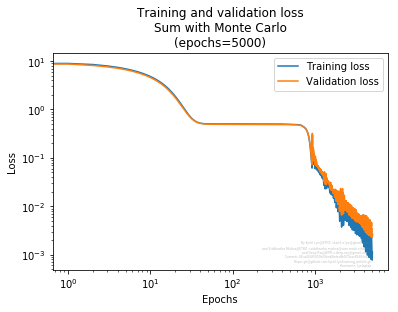

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


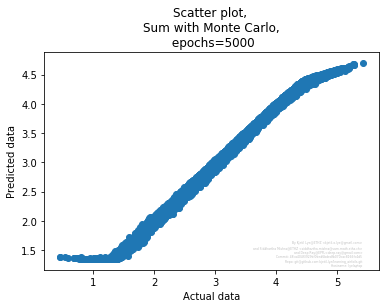

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                132       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_6 (Dense)              (None, 12)                132       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                130       
__________

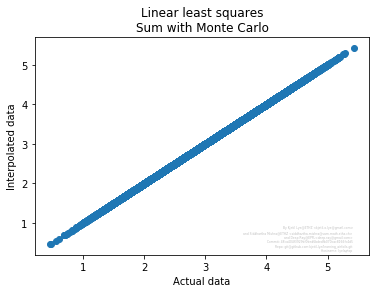

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


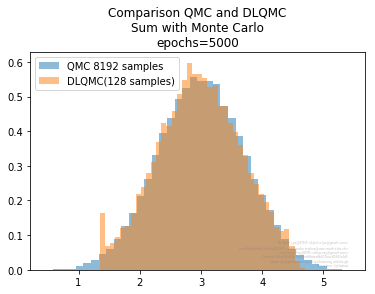

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


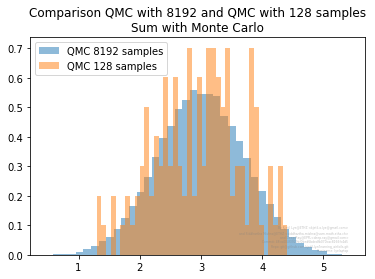

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


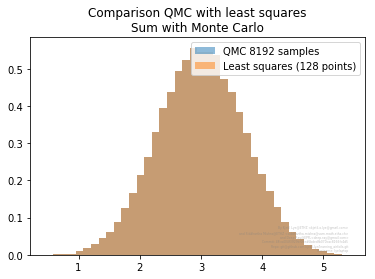

Memory usage: 416808
Memory usage: 416808


../python/machine_learning.py:360: RuntimeWarning: invalid value encountered in double_scalars
  stats[stat]['compute']=lambda x: sum(x)/x.shape[0]


In [ ]:
for data_source_name in data_sources.keys():
   
    for functional_name in functionals.keys():
        parameters = data_sources[data_source_name]
        functional = functionals[functional_name]
        
        samples = functional(parameters)
        title = '{} with {}'.format(functional_name, data_source_name)
        
        train(parameters=parameters, samples=samples, title=title)
   